<a href="https://colab.research.google.com/github/lanpty58/mystudy/blob/main/Motion_detection_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
cap = cv2.VideoCapture('D:\\Digital video processing\\videoplayback.mp4')
count = 0
frames = []
#cap.isOpened()
while(count <20):
  # Capture each frame
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(frame)
    # if ret == True:
      #  cv2.imshow("frame", frame)
      #  plt.imshow(frame, cmap=plt.cm.binary)
    # else:
    #     print('false')
    count+=1

(288, 352)


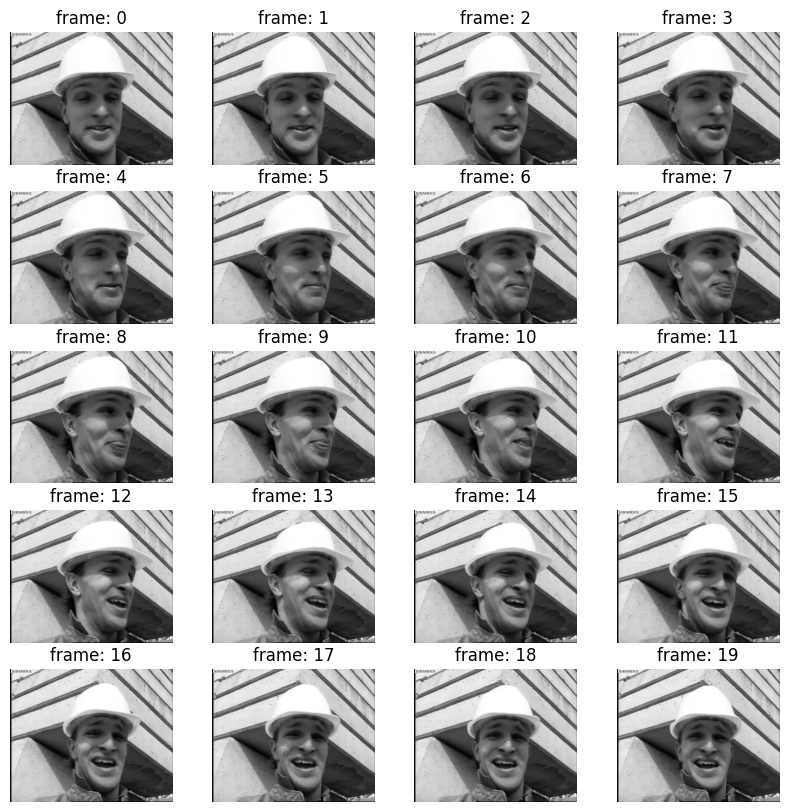

In [ ]:
fig = plt.figure(figsize=(10, 10))
print(frames[8].shape)
for i in range(len(frames)):
    fig.add_subplot(5, 4, i+1)
    plt.imshow(frames[i], cmap='gray')
    plt.axis('off')
    plt.title(f'frame: {i}')

In [ ]:
def block_mean(frames, start_frame, end_frame, startX, startY, block_size):
    sum =0
    for i in range(start_frame, end_frame):
        # print(f'frame: {i}, {startX+block_size}, {startY +block_size}')
        sum+= np.sum(frames[i][startX:startX+block_size, startY: startY+block_size])

    mean = sum/((end_frame- start_frame))
    return mean
def variance_estimation(frames, block_size, frame_group_num):
    frame_size = frames[0].shape
    frame_vars = []
    for i in range(frame_group_num-1, len(frames)):
        var_frame = np.zeros_like(frames[0])
        for x in range(0, frame_size[0] - block_size, block_size):
            for y in range(0, frame_size[1] - block_size, block_size):
                mean = block_mean(frames, i-frame_group_num+1, i+1, x, y, block_size)
                var = 0
                for f in range(i-frame_group_num+1, i+1, 1):
                    var += (np.sum(frames[f][x: x + block_size, y: y + block_size]) - mean)**2
                var = var/frame_group_num
                if var > (block_size*block_size*(50**2)):
                    var_frame[x: x+ block_size, y: y+block_size] = 0
                else:
                    var_frame[x: x+block_size, y: y+block_size] = 255
                # print(var)
                # var_frame.append(var)
        frame_vars.append(var_frame)
    return frame_vars

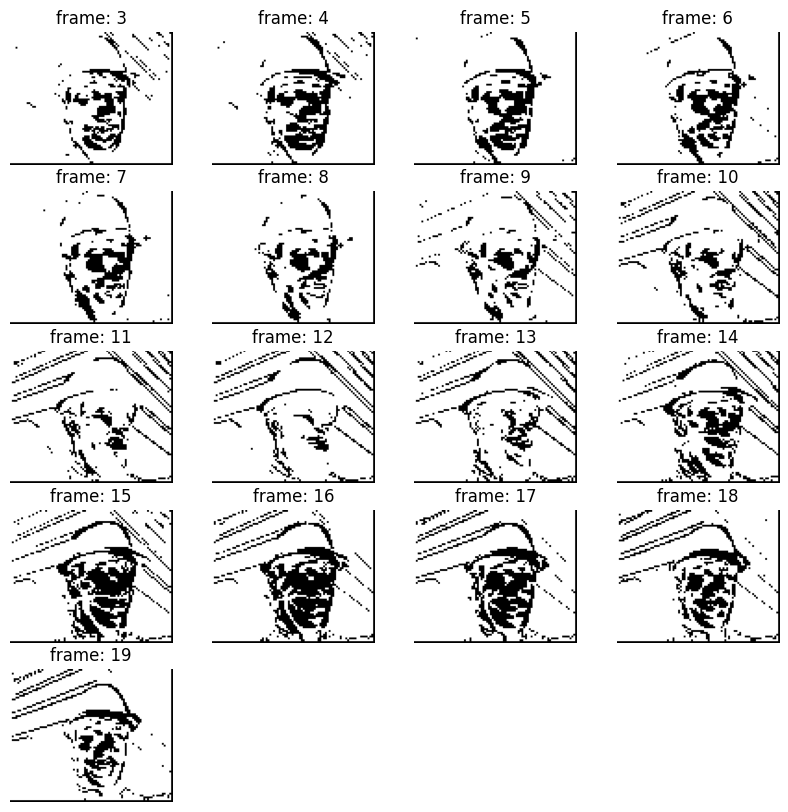

In [ ]:
frame_group_num = 4
variances = variance_estimation(frames, block_size=4, frame_group_num=frame_group_num)
fig = plt.figure(figsize=(10, 10))
for i in range(len(variances)):
    fig.add_subplot(5, 4, i+1)
    plt.imshow(variances[i], cmap='gray')
    plt.axis('off')
    plt.title(f'frame: {i+frame_group_num-1}')